In [1]:
import json
import pandas as pd
import numpy as np

# Load the training data
with open('/home/data/train.json', 'r') as f:
    train_data = json.load(f)

print(f"Number of training samples: {len(train_data)}")
print(f"Type of data: {type(train_data)}")
print(f"First sample keys: {list(train_data[0].keys())}")

Number of training samples: 2878
Type of data: <class 'list'>
First sample keys: ['giver_username_if_known', 'number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval', 'post_was_edited', 'request_id', 'request_number_of_comments_at_retrieval', 'request_text', 'request_text_edit_aware', 'request_title', 'requester_account_age_in_days_at_request', 'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request', 'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request', 'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request', 'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request', 'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request', 'requester_number_of_posts_on_raop_at_retrieval', 'requester_number_of_subreddits_at_request', 'requester_received_pizza', 'requester_subredd

In [2]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(train_data)

# Basic info about the dataset
print("Dataset shape:", df.shape)
print("\nTarget variable distribution:")
print(df['requester_received_pizza'].value_counts())
print(f"\nClass balance: {df['requester_received_pizza'].mean():.3f} (positive rate)")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum().sum())

Dataset shape: (2878, 32)

Target variable distribution:
requester_received_pizza
False    2163
True      715
Name: count, dtype: int64

Class balance: 0.248 (positive rate)

Missing values:
2163


In [3]:
# Check which columns have missing values
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print("Columns with missing values:")
print(missing_cols)

# Check data types
print("\nData types:")
print(df.dtypes.value_counts())

# Check unique values for categorical features
print("\nUnique values in key categorical features:")
categorical_cols = ['requester_user_flair', 'post_was_edited', 'giver_username_if_known']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].nunique()} unique values")
        print(df[col].value_counts().head())

Columns with missing values:
requester_user_flair    2163
dtype: int64

Data types:
int64      16
object      9
float64     6
bool        1
Name: count, dtype: int64

Unique values in key categorical features:

requester_user_flair: 2 unique values
requester_user_flair
shroom    677
PIF        38
Name: count, dtype: int64

post_was_edited: 216 unique values
post_was_edited
False           2423
True             241
1375324604.0       1
1366314331.0       1
1367280954.0       1
Name: count, dtype: int64

giver_username_if_known: 184 unique values
giver_username_if_known
N/A            2670
mr_jeep           4
leftnewdigg       3
m2nu              3
thr               3
Name: count, dtype: int64


Text feature analysis:
Request title length (chars): min=7, max=272, mean=71.6
Request text length (chars): min=0, max=4460, mean=402.5


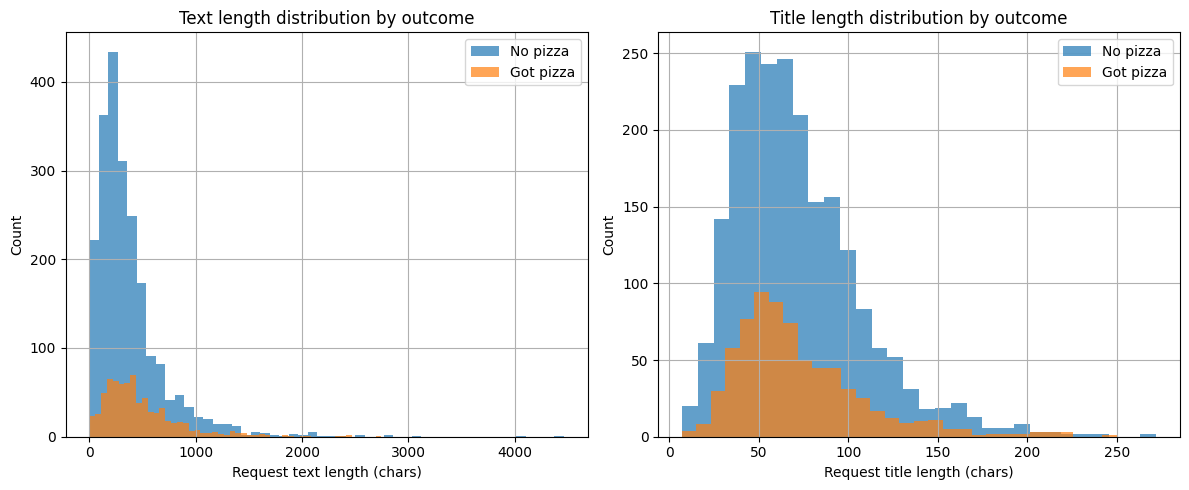

In [4]:
# Analyze text features
print("Text feature analysis:")
print(f"Request title length (chars): min={df['request_title'].str.len().min()}, max={df['request_title'].str.len().max()}, mean={df['request_title'].str.len().mean():.1f}")
print(f"Request text length (chars): min={df['request_text'].str.len().min()}, max={df['request_text'].str.len().max()}, mean={df['request_text'].str.len().mean():.1f}")

# Check correlation between text length and success
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df[df['requester_received_pizza']==False]['request_text'].str.len().hist(bins=50, alpha=0.7, label='No pizza')
df[df['requester_received_pizza']==True]['request_text'].str.len().hist(bins=50, alpha=0.7, label='Got pizza')
plt.xlabel('Request text length (chars)')
plt.ylabel('Count')
plt.legend()
plt.title('Text length distribution by outcome')

plt.subplot(1, 2, 2)
df[df['requester_received_pizza']==False]['request_title'].str.len().hist(bins=30, alpha=0.7, label='No pizza')
df[df['requester_received_pizza']==True]['request_title'].str.len().hist(bins=30, alpha=0.7, label='Got pizza')
plt.xlabel('Request title length (chars)')
plt.ylabel('Count')
plt.legend()
plt.title('Title length distribution by outcome')
plt.tight_layout()
plt.show()

In [5]:
# Analyze numerical features correlation with target
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'requester_received_pizza' in numerical_cols:
    numerical_cols.remove('requester_received_pizza')

# Calculate correlation with target
correlations = df[numerical_cols + ['requester_received_pizza']].corr()['requester_received_pizza'].sort_values(ascending=False)
print("Top correlations with target:")
print(correlations.head(10))
print("\nBottom correlations with target:")
print(correlations.tail(10))

# Check user flair impact
print("\nUser flair distribution by outcome:")
flair_pivot = pd.crosstab(df['requester_user_flair'], df['requester_received_pizza'], normalize='index')
print(flair_pivot)

# Check if post was edited impact
print("\nPost edited distribution by outcome:")
edited_pivot = pd.crosstab(df['post_was_edited'], df['requester_received_pizza'], normalize='index')
print(edited_pivot)

Top correlations with target:
requester_received_pizza                                1.000000
requester_number_of_posts_on_raop_at_retrieval          0.462165
request_number_of_comments_at_retrieval                 0.290709
requester_number_of_comments_in_raop_at_retrieval       0.277129
requester_number_of_posts_on_raop_at_request            0.132712
requester_number_of_comments_in_raop_at_request         0.131965
requester_days_since_first_post_on_raop_at_retrieval    0.127262
requester_number_of_comments_at_retrieval               0.123016
requester_account_age_in_days_at_retrieval              0.118863
requester_days_since_first_post_on_raop_at_request      0.108662
Name: requester_received_pizza, dtype: float64

Bottom correlations with target:
requester_upvotes_plus_downvotes_at_retrieval    0.052447
requester_number_of_subreddits_at_request        0.047001
requester_account_age_in_days_at_request         0.043374
requester_upvotes_minus_downvotes_at_request     0.043084
request

In [ ]:
# Analyze sentiment and politeness indicators in text
# Based on research, these are key predictive features

import re

def extract_sentiment_features(text):
    """Extract basic sentiment and politeness indicators"""
    if pd.isna(text):
        return {}
    
    features = {}
    
    # Gratitude indicators
    gratitude_words = ['thank', 'thanks', 'appreciate', 'grateful', 'bless']
    features['has_gratitude'] = int(any(word in text.lower() for word in gratitude_words))
    features['gratitude_count'] = sum(text.lower().count(word) for word in gratitude_words)
    
    # Politeness markers
    politeness_words = ['please', 'kindly', 'would', 'could', 'might', 'may', 'sorry', 'apologize']
    features['has_politeness'] = int(any(word in text.lower() for word in politeness_words))
    features['politeness_count'] = sum(text.lower().count(word) for word in politeness_words)
    
    # Need indicators (from Stanford research)
    need_words = ['job', 'family', 'money', 'student', 'hungry', 'broke', 'craving', 'bills', 'paycheck']
    features['has_need'] = int(any(word in text.lower() for word in need_words))
    features['need_count'] = sum(text.lower().count(word) for word in need_words)
    
    # Reciprocity indicators
    reciprocity_words = ['promise', 'pay', 'forward', 'return', 'favor', 'help', 'give back']
    features['has_reciprocity'] = int(any(word in text.lower() for word in reciprocity_words))
    features['reciprocity_count'] = sum(text.lower().count(word) for word in reciprocity_words)
    
    # Exclamation marks (enthusiasm/urgency)
    features['exclamation_count'] = text.count('!')
    
    return features

# Extract features from request text
print("Extracting sentiment features from request text...")
text_features = df['request_text'].apply(extract_sentiment_features)
text_features_df = pd.DataFrame(text_features.tolist())

# Extract features from request title
print("Extracting sentiment features from request title...")
title_features = df['request_title'].apply(extract_sentiment_features)
title_features_df = pd.DataFrame(title_features.tolist())
title_features_df.columns = [f"title_{col}" for col in title_features_df.columns]

# Combine all features
all_features = pd.concat([text_features_df, title_features_df], axis=1)

# Analyze correlation with target
print("\nCorrelation of sentiment features with target:")
sentiment_correlations = all_features.corrwith(df['requester_received_pizza']).sort_values(ascending=False)
print(sentiment_correlations)

# Check which features are most predictive
print("\nTop predictive sentiment features:")
print(sentiment_correlations.abs().sort_values(ascending=False).head(10))